In [1]:
# Install required module
!pip install openpyxl -q
!pip install git+https://github.com/LIAAD/yake -q
!pip install wordcloud -q

In [2]:
# Import Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl
import yake 

#for plotting images & adjusting colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
# Load Data
xlsx = '../input/bhagavad-gita/bhagavad-gita.xlsx'
sheet = 'Bhagavad-Gita'
df = pd.read_excel(xlsx, sheet_name=sheet, engine='openpyxl')

# Drop Column
df.drop('S.No.',axis=1, inplace=True)

# Drop NULL
df.dropna(inplace=True)

# Reset Index
df.reset_index(drop=True,inplace=True)

# View Data
df.head()

,Title,Chapter,Verse,Sanskrit Anuvad,Hindi Anuvad,Enlgish Translation
0,Arjuna's Vishada Yoga,Chapter 1,Verse 1.1,धृतराष्ट्र उवाच । धर्मक्षेत्रे कुरुक्षेत्रे सम...,धृतराष्ट्र बोले- हे संजय! धर्मभूमि कुरुक्षेत्र...,"Dhrtarashtra asked of Sanjaya: O SANJAYA, what..."
1,Arjuna's Vishada Yoga,Chapter 1,Verse 1.2,सञ्जय उवाच । दृष्ट्वा तु पाण्डवानीकं व्यूढं दु...,संजय बोले- उस समय राजा दुर्योधन ने व्यूहरचनायु...,Sanjaya explained: Now seeing that the army of...
2,Arjuna's Vishada Yoga,Chapter 1,Verse 1.3,पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् । व...,हे आचार्य! आपके बुद्धिमान्‌ शिष्य द्रुपदपुत्र ...,"Behold O, Master, the mighty army of the sons ..."
3,Arjuna's Vishada Yoga,Chapter 1,Verse 1.4,अत्र शूरा महेष्वासा भीमार्जुनसमा युधि । युयुधा...,इस सेना में बड़े-बड़े धनुषों वाले तथा युद्ध मे...,"Present here are the mighty archers, peers or ..."
4,Arjuna's Vishada Yoga,Chapter 1,Verse 1.5,धृष्टकेतुश्चेकितानः काशिराजश्च वीर्यवान् । पुर...,"धृष्टकेतु, चेकिताना, और काशी के बहादुर राजा, प...","Dhrishtaketu, Chekitana, and the valiant king ..."


In [4]:
# Custom function to extract keyword using YAKE
def extract_keyword(txt):
    max_ngram_size = 1  # single word
    deduplication_thresold = 0.1   #avoid the repetition of words in keywords
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords = 1  # top word with lowest score
    
    custom_kw_extractor = yake.KeywordExtractor(n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(txt)
    return keywords[0][0]


## Hindi Anuvad - Keywords

In [5]:
# Applying the function
df['Keywrd_Hin'] = df['Hindi Anuvad'].apply(lambda x: extract_keyword(x))

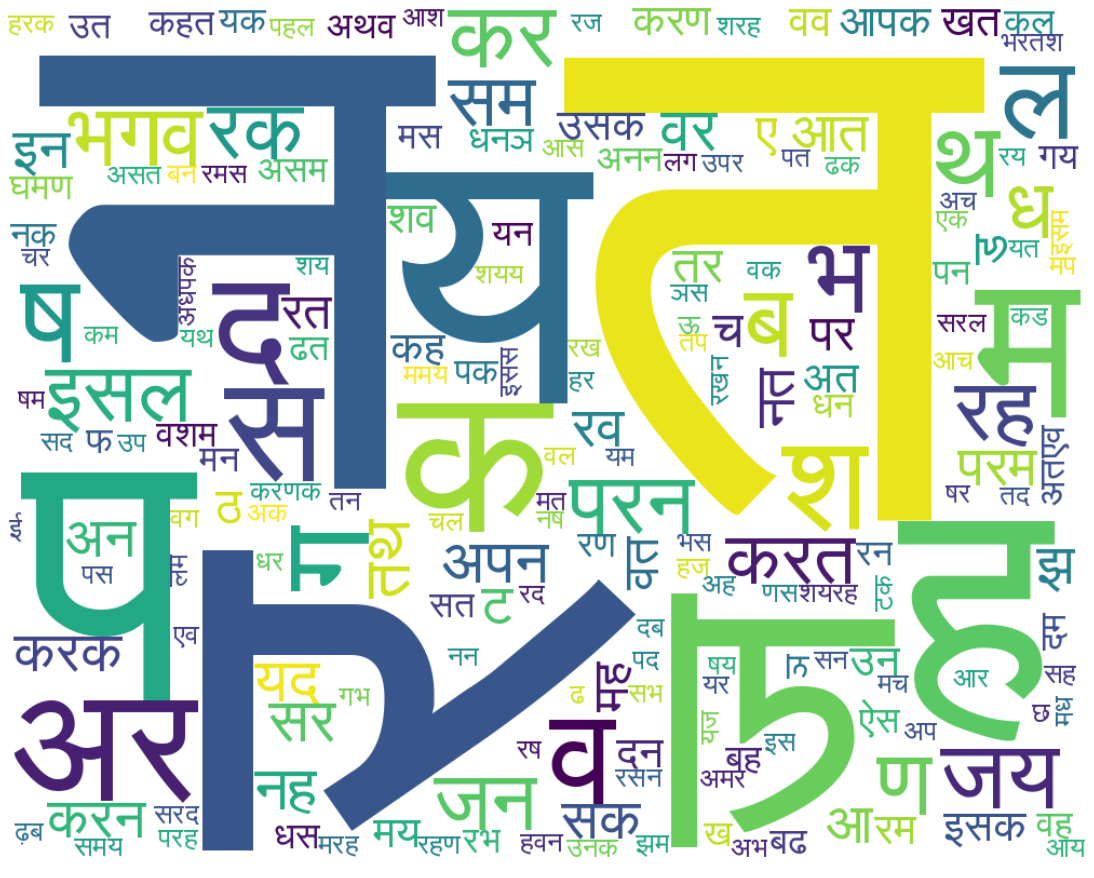

In [6]:
# Generate Word Cloud
cloud_txt = df['Keywrd_Hin'].tolist() 
cloud_txt = ' '.join(cloud_txt)
font_path = '../input/hindi-font-stopwords/gargi.ttf'
stopword_path = '../input/hindi-font-stopwords/stopwords_hin.txt'

wordcloud = WordCloud(font_path=font_path
                      ,width = 1000
                      ,height = 800
                      ,background_color ='white'
                      ,stopwords = stopword_path
                      ,min_font_size = 8
                      ,collocations=False).generate(cloud_txt)

#plot the wordcloud object
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Sanskrit Anuvad - Keywords

In [7]:
# Applying the function
df['Keywrd_Sans'] = df['Sanskrit Anuvad'].apply(lambda x: extract_keyword(x))

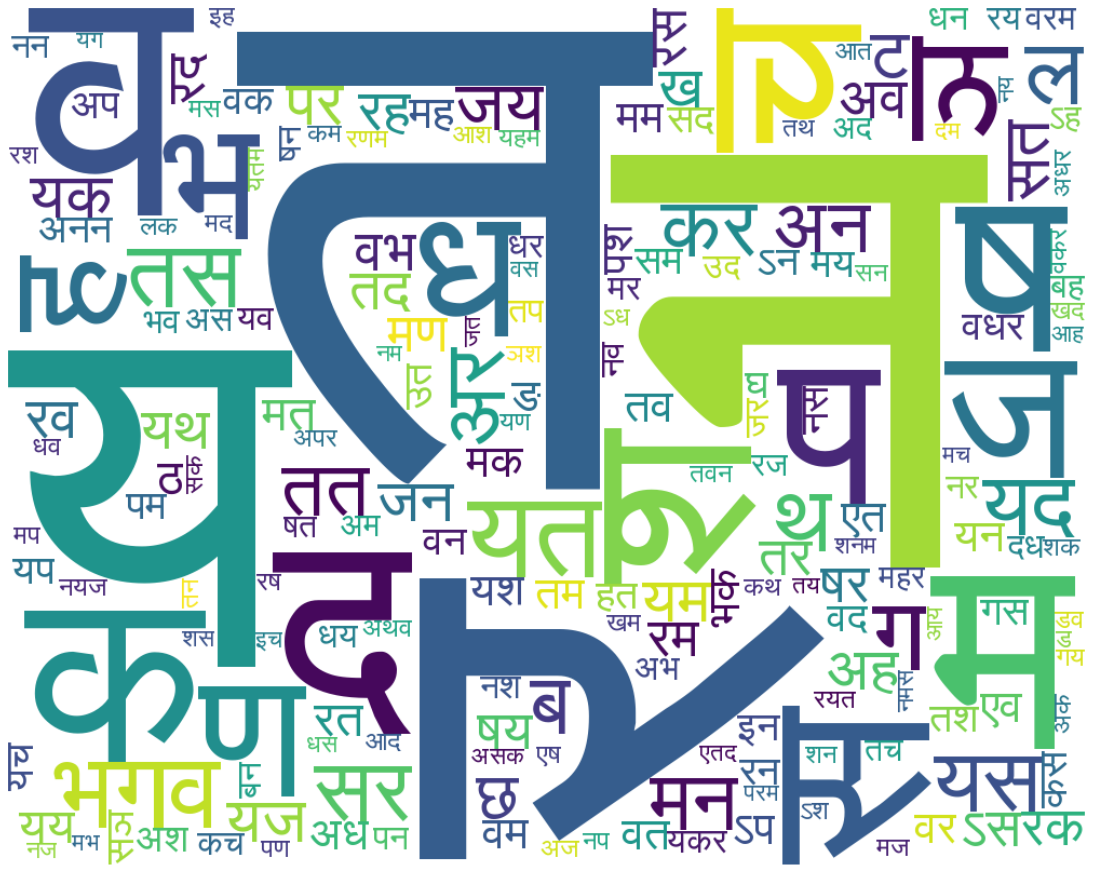

In [8]:
# Generate Word Cloud
cloud_txt = df['Keywrd_Sans'].tolist() 
cloud_txt = ' '.join(cloud_txt)
font_path = '../input/hindi-font-stopwords/gargi.ttf'
#stopword_path = '../input/hindi-font-stopwords/stopwords_hin.txt'

wordcloud = WordCloud(font_path=font_path
                      ,width = 1000
                      ,height = 800
                      ,background_color ='white'
                     # ,stopwords = stopword_path
                      ,min_font_size = 8
                      ,collocations=False).generate(cloud_txt)

#plot the wordcloud object
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## English Translation

In [9]:
# Applying the function
df['Keywrd_Eng'] = df['Enlgish Translation'].apply(lambda x: extract_keyword(x))

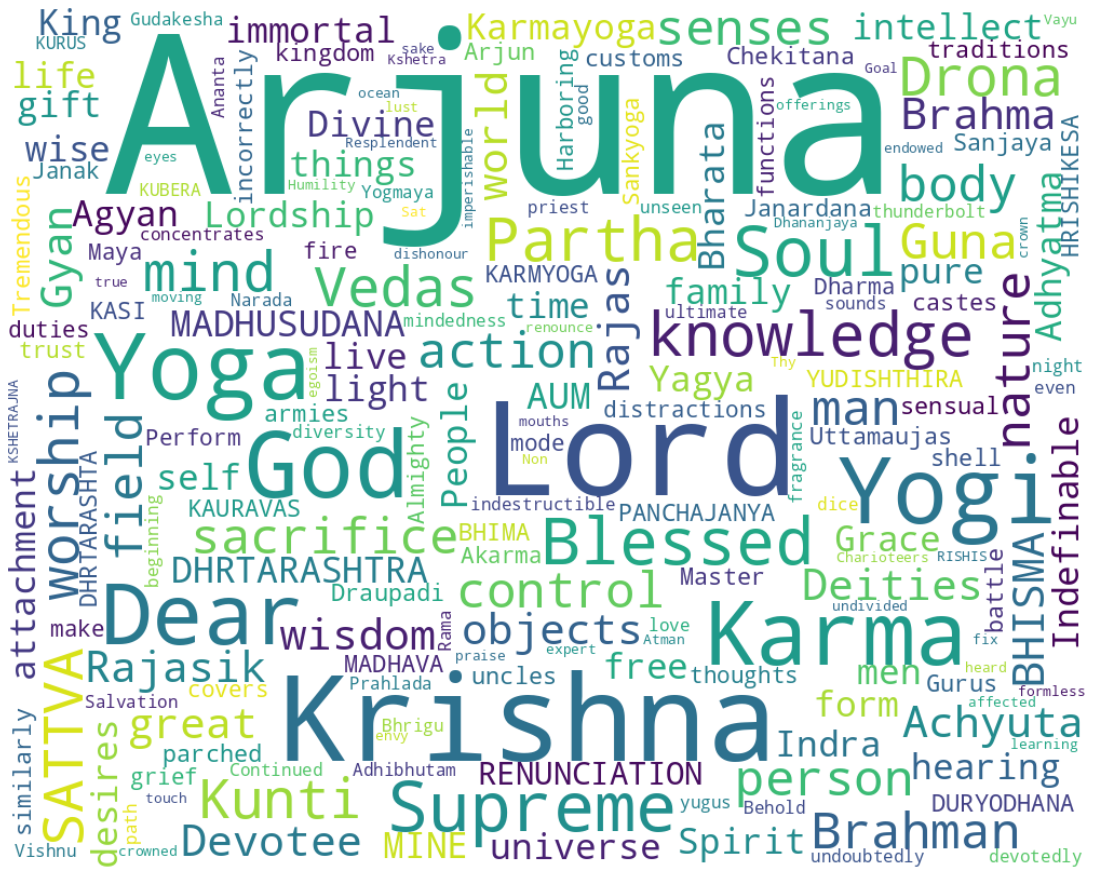

In [10]:
# Generate Word Cloud
cloud_txt = df['Keywrd_Eng'].tolist() 
cloud_txt = ' '.join(cloud_txt)
#font_path = '../input/hindi-font-stopwords/gargi.ttf'
#stopword_path = '../input/hindi-font-stopwords/stopwords_hin.txt'

wordcloud = WordCloud(width = 1000
                      ,height = 800
                      ,background_color ='white'
                      ,min_font_size = 8
                      ,collocations=False).generate(cloud_txt)

#plot the wordcloud object
plt.figure(figsize = (15, 15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()